In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1986 - accuracy: 0.9412
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0775 - accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0523 - accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0424 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0323 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0279 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0214 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0180 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 31s 17m

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0636 - accuracy: 0.9844


[0.06364048272371292, 0.9843999743461609]

1/1 [==============================] - 0s 85ms/step
6


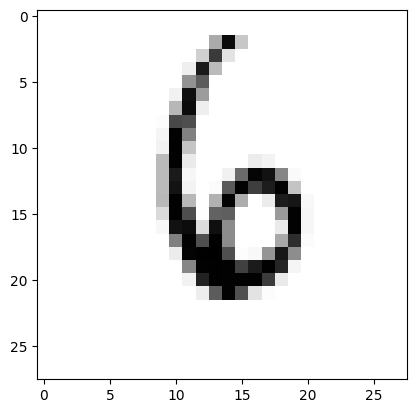

In [11]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [20]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test)
y_predict[0]

313/313 [==============================] - 1s 3ms/step


array([4.3725802e-15, 6.4371306e-16, 1.0918203e-12, 1.6321914e-11,
       2.2387629e-15, 2.4462086e-14, 1.4612780e-21, 1.0000000e+00,
       1.9547055e-13, 8.7898563e-13], dtype=float32)

In [21]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as s

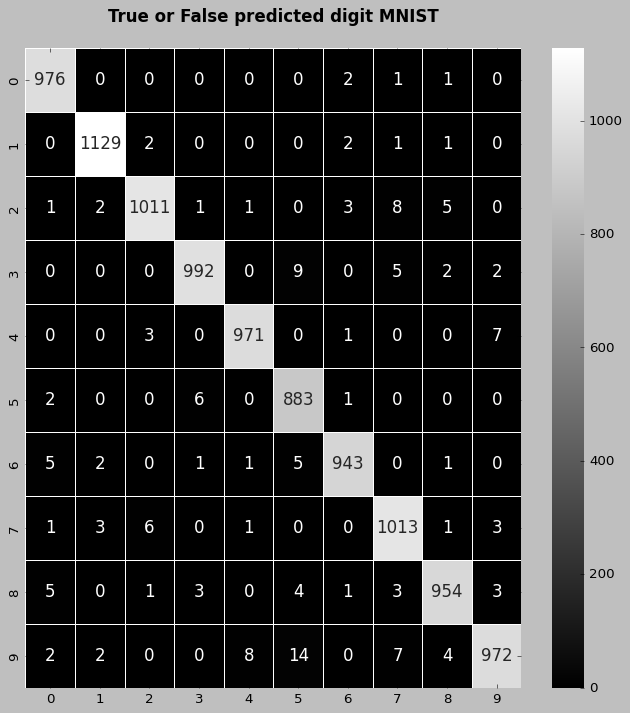

In [22]:
#Confusion matrix for Digit MNIST
from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(y_test,y_predicts)
plt.style.use('classic')
plt.figure(figsize=(10,10))
s.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

